In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")


indices = {
    "NIFTY 50": "^NSEI",
    "Auto": "^CNXAUTO",
    "Bank": "^NSEBANK",
    "Energy": "^CNXENERGY",
    "FMCG": "^CNXFMCG",
    "Financial Services": "NIFTY_FIN_SERVICE.NS",
    "IT": "^CNXIT",
    "Media": "^CNXMEDIA",
    "Metal": "^CNXMETAL",
    "PSE": "^CNXPSE",
    "Pharma": "^CNXPHARMA",
    "Realty": "^CNXREALTY",
    "Services Sector": "^CNXSERVICE"
}

data = yf.download(list(indices.values()), start="2010-01-01", interval="1MO")["Close"]
data = data.dropna()
data.columns = indices.keys()

data


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  13 of 13 completed


,NIFTY 50,Auto,Bank,Energy,FMCG,Financial Services,IT,Media,Metal,PSE,Pharma,Realty,Services Sector
Date,,,,,,,,,,,,,
2011-09-01,3833.459961,3549.620117,7735.750000,9947.650391,5678.899902,1195.400024,2921.389893,4520.950195,3051.000000,237.600006,5951.649902,9468.189453,4943.250000
2011-10-01,4076.530029,3944.050049,8230.900391,10670.049805,6278.700195,1244.599976,3157.149902,4735.600098,3095.000000,261.450012,6386.899902,9989.534180,5326.600098
2011-11-01,3552.280029,3527.800049,7485.299805,10271.400391,5893.250000,1175.900024,2710.300049,4710.850098,2838.100098,210.100006,5763.049805,8564.000000,4832.049805
2011-12-01,3367.669922,3390.550049,6968.100098,10217.150391,6139.000000,1114.300049,2464.600098,4576.250000,2653.800049,184.199997,5600.950195,7968.557129,4624.299805
2012-01-01,4074.250000,3836.500000,7890.049805,10327.700195,6193.850098,1223.949951,3073.800049,4890.350098,2885.600098,231.449997,6332.750000,9919.334961,5199.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,17989.650391,12731.799805,21682.250000,44940.449219,29663.949219,1704.800049,5269.100098,11747.099609,4389.500000,393.200012,22972.900391,40269.050781,17303.949219
2023-03-01,18058.699219,12243.799805,22814.449219,45904.898438,28698.599609,1700.099976,5497.450195,12017.049805,4474.000000,387.350006,23037.000000,40608.648438,17359.750000
2023-04-01,19162.550781,13189.250000,23734.550781,47814.101562,27708.199219,1714.849976,5799.399902,12613.950195,4683.149902,445.100006,23733.750000,43233.898438,18065.000000


In [5]:
returns = data.pct_change().dropna()


rolling_betas = pd.DataFrame(index=returns.index)

for col in returns.columns:
    if col == "NIFTY 50":
        continue
    cov = returns[col].rolling(36).cov(returns["NIFTY 50"])
    var = returns["NIFTY 50"].rolling(36).var()
    rolling_betas[col] = cov / var

# Drop early NaNs
rolling_betas = rolling_betas.dropna()

rolling_betas

,Auto,Bank,Energy,FMCG,Financial Services,IT,Media,Metal,PSE,Pharma,Realty,Services Sector
Date,,,,,,,,,,,,
2014-09-01,0.687793,0.652820,0.252159,-0.180480,0.624146,0.976819,0.074359,0.724691,1.467538,0.597235,1.168529,0.589330
2014-10-01,0.665921,0.646418,0.222422,-0.201931,0.625096,0.956887,0.060906,0.736949,1.421112,0.592250,1.173835,0.577574
2014-11-01,0.632991,0.621283,0.205137,-0.274051,0.646542,0.921893,0.046957,0.728238,1.429030,0.572811,1.179153,0.554999
2014-12-01,0.631077,0.619062,0.202576,-0.263860,0.634159,0.917092,0.032961,0.724861,1.425331,0.574760,1.175191,0.552638
2015-01-01,0.652694,0.605819,0.265259,-0.295439,0.664312,0.799352,0.001390,0.787519,1.474144,0.573495,1.168459,0.553388
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,0.716210,0.635385,0.272795,0.396599,0.761688,0.953387,0.256501,0.648668,0.977083,0.812377,1.066352,0.676256
2023-03-01,0.514140,0.642302,0.287708,0.293560,0.484562,0.921950,0.288286,0.668340,0.831998,0.772495,1.045095,0.622622
2023-04-01,0.401307,0.574679,0.290720,0.238631,0.444966,0.894831,0.105792,0.664765,0.897002,0.749034,1.058089,0.579669


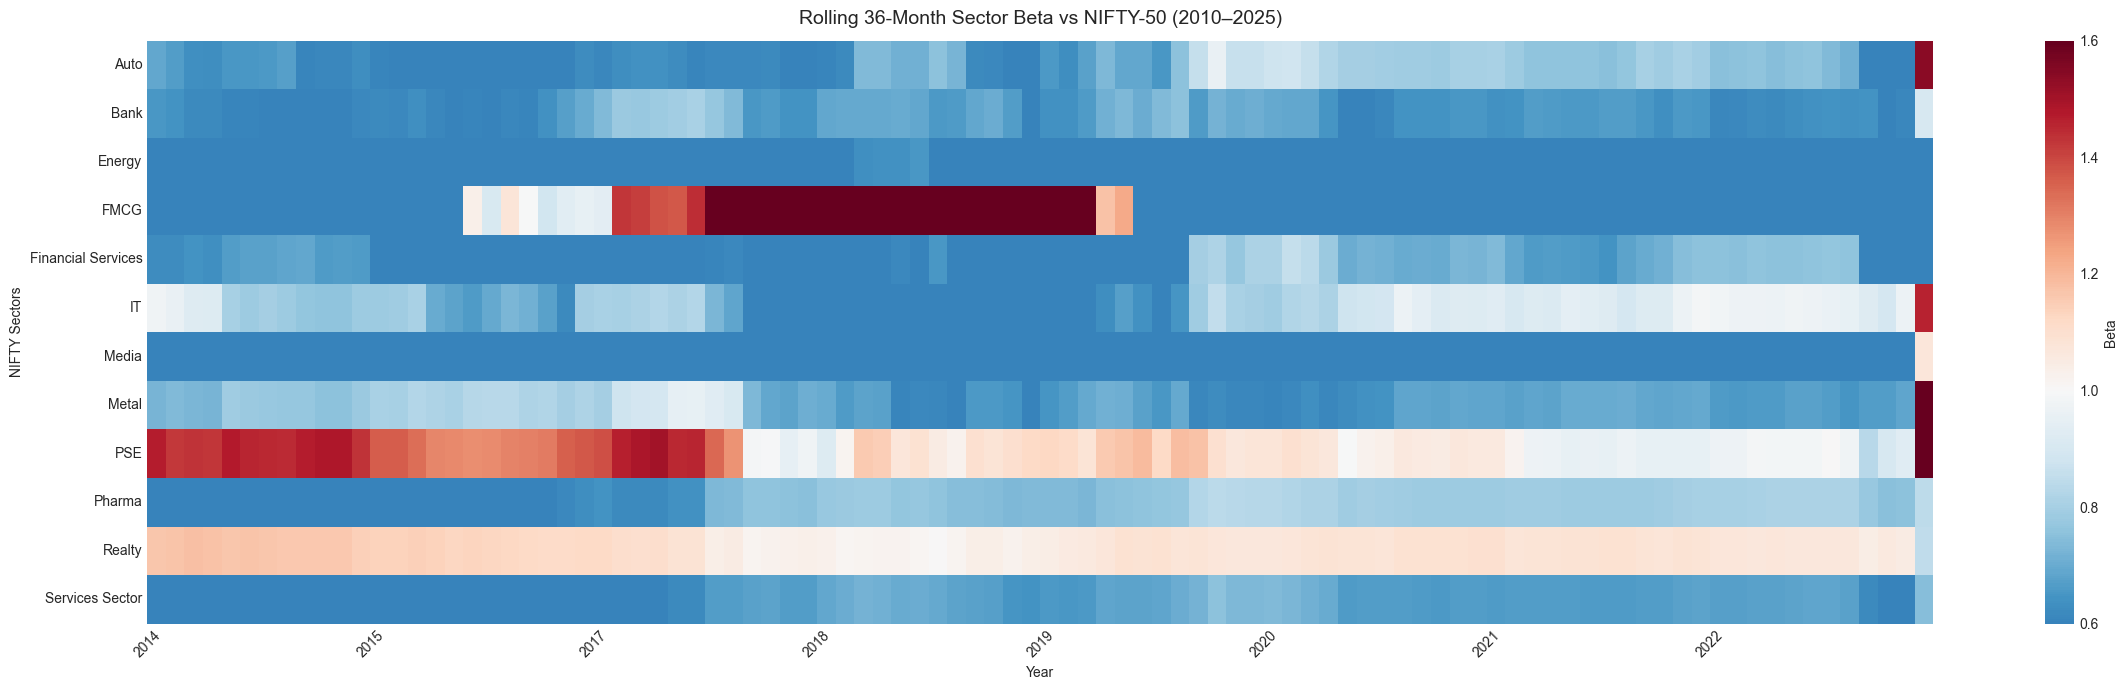

In [6]:
heatmap_df = rolling_betas.T  # transpose: sectors as rows
heatmap_df = heatmap_df.loc[:, ~heatmap_df.columns.duplicated()]  # clean duplicates if any


plt.figure(figsize=(24, 7))
sns.heatmap(
    heatmap_df,
    cmap="RdBu_r",
    center=1,
    cbar_kws={"label": "Beta"},
    vmin=0.6,
    vmax=1.6
)

plt.title(
    "Rolling 36-Month Sector Beta vs NIFTY-50 (2010–2025)",
    fontsize=14,
    pad=12
)
plt.xlabel("Year")
plt.ylabel("NIFTY Sectors")

# Make x-axis more readable
plt.xticks(
    ticks=np.arange(0, len(heatmap_df.columns), 12),
    labels=[heatmap_df.columns[i].strftime("%Y") for i in range(0, len(heatmap_df.columns), 12)],
    rotation=45
)
plt.tight_layout()
plt.show()

In [7]:
print("Latest 36-Month Betas (as of last available date):")
print(rolling_betas.iloc[-1].round(2))

Latest 36-Month Betas (as of last available date):
Auto                  1.54
Bank                  0.90
Energy                0.33
FMCG                  0.36
Financial Services    0.07
IT                    1.46
Media                 1.08
Metal                 1.74
PSE                   1.75
Pharma                0.85
Realty                0.85
Services Sector       0.75
Name: 2025-10-01 00:00:00, dtype: float64


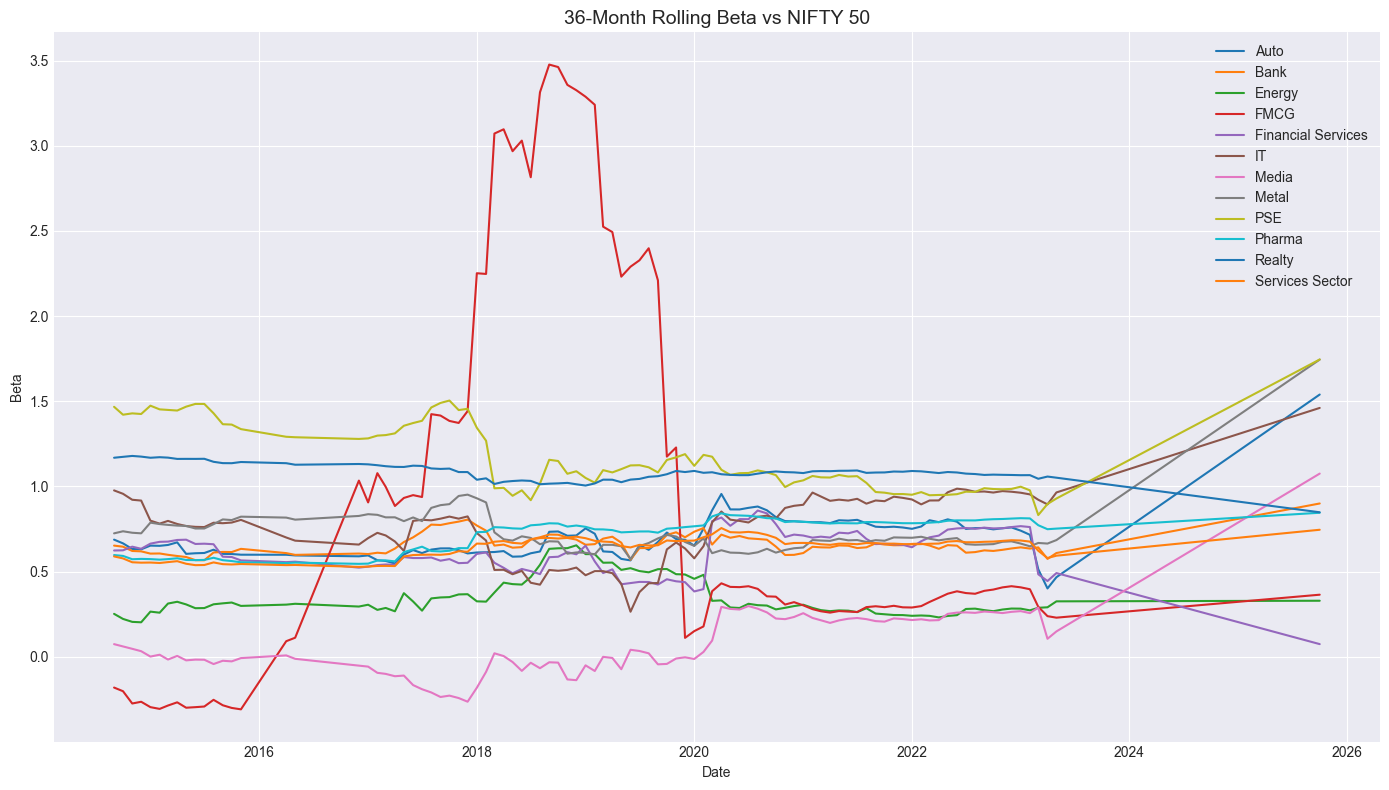

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for col in rolling_betas.columns:
    plt.plot(rolling_betas.index, rolling_betas[col], label=col)

plt.title("36-Month Rolling Beta vs NIFTY 50", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend(loc="best")
plt.tight_layout()
plt.show()